# Demonstration of Linear Regression

1. [Generate data](##Generate-data)
2. [Inspect data](#Inspect-data)
3. [Fit the model](#Fit-the-model)
4. [Make prediction](#Make-prediction)
5. [Final visualization](#Final-visualization)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5)

## Generate data

In [2]:
x_data = np.linspace(0,5,100)
y_data = np.exp(x_data) + np.random.normal(-5, 5, len(x_data))

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=42)

## Inspect data

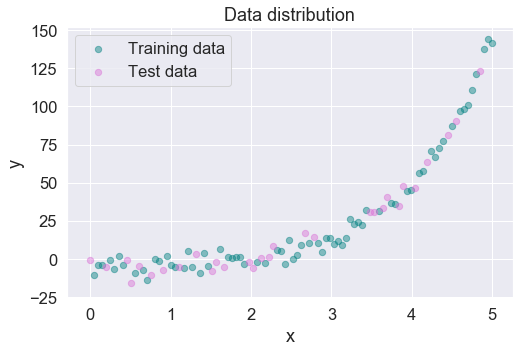

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train, s=40, color='teal', alpha=0.45, label='Training data')
plt.scatter(x_test, y_test, s=40, color='orchid', alpha=0.45, label='Test data')
plt.title('Data distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## Fit model

In [4]:
X_train = x_train[:, np.newaxis]           # transform to make suitable for fit method

poly_feat_1 = PolynomialFeatures(degree=1)
X_poly_1 = poly_feat_1.fit_transform(X_train)
model_1 = LinearRegression()
model_1.fit(X_poly_1, y_train)
r2_1 = model_1.score(X_poly_1, y_train)    # metric of how good the fit is


#poly_reg = PolynomialFeatures(degree=4)
#X_poly = poly_reg.fit_transform(X)
##pol_reg = LinearRegression()
#pol_reg.fit(X_poly, y)
#X, pol_reg.predict(poly_reg.fit_transform(X))

poly_feat_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_feat_2.fit_transform(X_train)
model_2 = LinearRegression()
model_2.fit(X_poly_2, y_train)
r2_2 = model_2.score(X_poly_2, y_train)    # metric of how good the fit is

poly_feat_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_feat_3.fit_transform(X_train)
model_3 = LinearRegression()
model_3.fit(X_poly_3, y_train)
r2_3 = model_3.score(X_poly_3, y_train)    # metric of how good the fit is

print(f'R2: {r2_1:.4f} (degree 1) \nR2: {r2_2:.4f} (degree 2) \nR2: {r2_3:.4f} (degree 3)')

R2: 0.7116 (degree 1) 
R2: 0.9533 (degree 2) 
R2: 0.9875 (degree 3)


## Make prediction

In [5]:
X_test = x_test[:, np.newaxis]
model_1

#X_poly = poly_reg.fit_transform(X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
X_test = x_test[:, np.newaxis] 


y_pred_1 = model_1.predict(poly_feat_1.fit_transform(X_test))
y_pred_2 = model_2.predict(poly_feat_2.fit_transform(X_test))
y_pred_3 = model_3.predict(poly_feat_3.fit_transform(X_test))

x1, y1 = zip(*sorted(zip(x_test, y_pred_1)))
x2, y2 = zip(*sorted(zip(x_test, y_pred_2)))
x3, y3 = zip(*sorted(zip(x_test, y_pred_3)))



## Final visualization

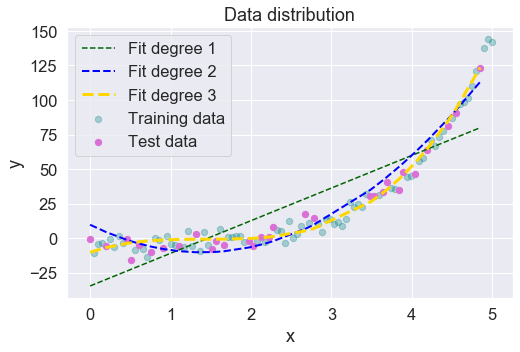

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train, s=40, color='teal', alpha=0.3, label='Training data')
plt.scatter(x_test, y_test, s=40, color='orchid', alpha=1, label='Test data')
plt.plot(x1, y1, color='darkgreen', linestyle='--', label='Fit degree 1', linewidth=1.5)
plt.plot(x2, y2, color='blue',linestyle='--', label='Fit degree 2', linewidth=2)
plt.plot(x3, y3, color='gold', linestyle='--', label='Fit degree 3', linewidth=3)

plt.title('Data distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();
